# Support Vector Machine Models

**Support vector machines (SVMs)** are a widely used and powerful category of machine learning algorithms. There are many variations on the basic idea of an SVM. An SVM attempts to **maximally seperate** classes by finding the **suport vector** with the lowest error rate or maximum separation. SVMs can use many types of **kernel functions**. The most common kernel functions are **linear** and the **radial basis function** or **RBF**. The linear basis function attempts to separate classes by finding hyperplanes in the feature space that maximally separate classes. The RBF uses set of local Gaussian shaped basis kernels to find a nonlinear separation of the classes.

## Example: Iris dataset

As an example we will use SVMs to classify the species of iris flowers.

In [1]:
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

To get a feel for these data, we will now load and plot them. The code in the cell below does the following:

1. Loads the iris data as a Pandas data frame. 
2. Adds column names to the data frame.
3. Displays all 4 possible scatter plot views of the data. 

Examine the results:

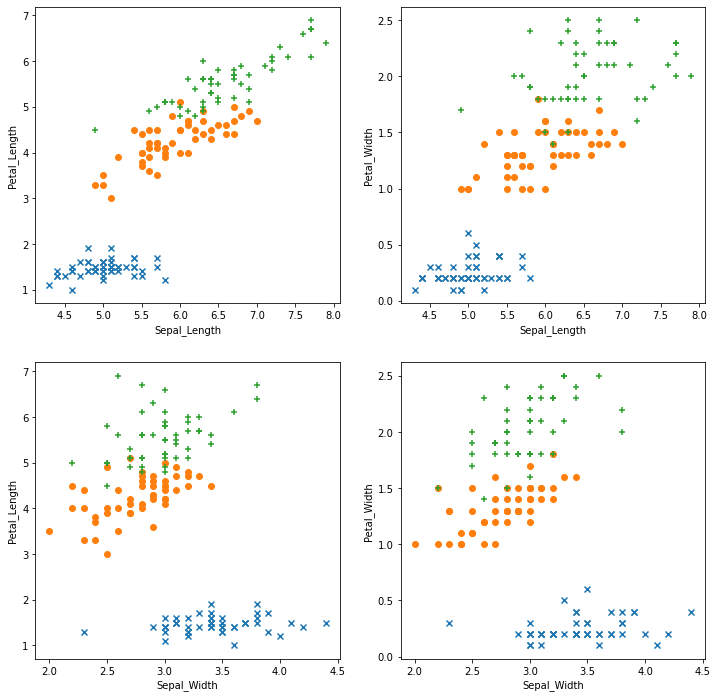

In [2]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris)

# Train Test Split

** We will split the data into a training set and a testing set.**

In [3]:
X = iris.drop('Species',axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.30)

# Train a Model

Now we will call the SVC() model from sklearn and fit the model to the training data.

In [4]:
from sklearn.svm import SVC
svc_model =  SVC()
svc_model.fit(X_train,y_train)

SVC()

## Model Evaluation

**Now we will get predictions from the model and create a confusion matrix and a classification report.**

In [5]:
predictions = svc_model.predict(X_test)

In [6]:
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 17  2]
 [ 0  0 13]]


In [8]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94        19
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



A non- linear RBF kernel model has given perfect accuracy on this data set, what if you use a linear svm model? Can we obtain a comparable accuracy?

In [9]:
svm_mod = svm.LinearSVC()
svm_mod.fit(X_train, y_train)

C:\Users\OLADEJI TOLUWANI\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [10]:
scores = svm_mod.predict(X_test)

### Linear Model Evaluation

In [11]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          13                0                 0
Actual Versicolor       0               17                 2
Actual Vriginica        0                0                13

Accuracy        0.96
 
          Setosa  Versicolor  Virginica
Num case   13.00     19.00      13.00
Precision   1.00      1.00       0.87
Recall      1.00      0.89       1.00
F1          1.00      0.94       0.93


## Second example

Now, we will try a different using the credit scoring data. You will use the prepared data which had the following preprocessing:
1. Cleaning missing values.
2. Aggregating categories of certain categorical variables. 
3. Encoding categorical variables as binary dummy variables.
4. Standardizing of numeric variables. 

In [12]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

(1000, 35)
(1000,)


Nested cross validation can be used to estimate the optimal hyperparameters and perform model selection for the nonlinear SVM model. 5 fold cross validation is used since training SVMs are computationally intensive to train. Additional folds would give better estimates but at the cost of greater computation time. We will execute the code in the cell below to define inside and outside fold objects.

In [13]:
nr.seed(123)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=5, shuffle = True)

The code in the cell below estimates the best hyperparameters using 5 fold cross validation. There are two points to notice here:
1. In this case, a grid of two hyperparameters: C is the inverse of lambda of l2 regularization, and gamma is the span of the RBF kernel. 
2. Since there is a class imbalance and a difference in the cost to the bank of misclassification of a bad credit risk customer, class weights are used. 
3. The model is fit on the grid and the best estimated hyperparameters are printed.

In [14]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0]}
## Define the SVM model
svc_clf = svm.SVC(class_weight = {0:0.33, 1:0.67}) 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

10
0.02


Now we can perform outer cross validation on the optimal hyperparameters

In [15]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.774
SDT of the metric       = 0.016
Outcomes by cv fold
Fold  1    0.761
Fold  2    0.758
Fold  3    0.800
Fold  4    0.768
Fold  5    0.782


Notice that the standard deviation of the mean of the AUC is more than an order of magnitude smaller than the mean. This indicates that this model is likely to generalize well. 

Now, now we build and test a model using the estimated optimal hyperparameters.

In [16]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

The code in the cell below defines a nonlinear SVM model object using the estimated optimal model hyperparameters and then fits the model to the training data.

In [17]:
nr.seed(1115)
svm_mod = svm.SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = {0:0.33, 1:0.67},
                  probability=True) 
svm_mod.fit(X_train, y_train)

SVC(C=10, class_weight={0: 0.33, 1: 0.67}, gamma=0.02, probability=True)

Next, we will compute the scores and prints evaluation metrics for the model, using the test data subset.

In [18]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       187                25
Actual negative        46                42

Accuracy        0.76
AUC             0.80
Macro precision 0.71
Macro recall    0.68
 
           Positive      Negative
Num case      212            88
Precision    0.80          0.63
Recall       0.88          0.48
F1           0.84          0.54


Generally, these performance metrics look good.  A large majority of high credit risk customers are identified, but at the cost of a large number of false positives and a low precision for the negative cases. However, one should be cautious. The reported AUC is quite a bit better than the mean achieved with the 5 fold cross validation. It is likely these figures are optimistic. 